# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mainpath = "../Datasets/"
filename = "HVAC_limpio.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HVAC_limpio", index_col=0)
data

Fecha- hora de lectura  POTENCIA TRAFO 2  POTENCIA TRAFO 3  \
0        2016-01-01 00:00:00          0.783603         38.338665   
1        2016-01-01 00:15:00          0.926969         38.338665   
2        2016-01-01 00:30:00          0.793163         38.455196   
3        2016-01-01 00:45:00          0.860073         38.688263   
4        2016-01-01 01:00:00          0.812257         38.688263   
5        2016-01-01 01:15:00          0.888717         38.688263   
6        2016-01-01 01:30:00          0.802738         38.688263   
7        2016-01-01 01:45:00          0.831385         38.688263   
8        2016-01-01 02:00:00          0.802729         38.688263   
9        2016-01-01 02:15:00          0.898297         38.688263   
10       2016-01-01 02:30:00          0.764496         38.688263   
11       2016-01-01 02:45:00          0.840958         38.688263   
12       2016-01-01 03:00:00          0.907860         38.688263   
13       2016-01-01 03:15:00          0.850489         38.688263   
14       2016-01-01 03:30:00          0.793161         38.688263   
15       2016-01-01 03:45:00          0.860039         38.688263   
16       2016-01-01 04:00:00          0.860057         38.688263   
17       2016-01-01 04:15:00          0.821814         38.688263   
18       2016-01-01 04:30:00          0.802738         38.688263   
19       2016-01-01 04:45:00          0.649816         38.090073   
20       2016-01-01 05:00:00          0.764503         38.804790   
21       2016-01-01 05:15:00          0.688040         38.804790   
22       2016-01-01 05:30:00          0.659378         38.804790   
23       2016-01-01 05:45:00          0.688053         38.804790   
24       2016-01-01 06:00:00          0.707171         38.804790   
25       2016-01-01 06:15:00          0.649824         38.804790   
26       2016-01-01 06:30:00          0.678497         38.804790   
27       2016-01-01 06:45:00          0.688048         38.804790   
28       2016-01-01 07:00:00          0.726270         38.804790   
29       2016-01-01 07:15:00          0.630708         38.804790   
...                      ...               ...               ...   
79255    2018-04-05 16:45:00         21.415659         49.314690   
79256    2018-04-05 17:00:00         21.415659         29.335971   
79257    2018-04-05 17:15:00         21.415659         29.335971   
79258    2018-04-05 17:30:00         21.415659         29.335971   
79259    2018-04-05 17:45:00         21.415659         53.670879   
79260    2018-04-05 18:00:00         21.415659         50.025482   
79261    2018-04-05 18:15:00         21.415659         29.335971   
79262    2018-04-05 18:30:00         21.415659         29.335971   
79263    2018-04-05 18:45:00         21.415659         54.136429   
79264    2018-04-05 19:00:00         21.415659         50.777836   
79265    2018-04-05 19:15:00         21.415659         29.335971   
79266    2018-04-05 19:30:00         21.415659         54.223717   
79267    2018-04-05 19:45:00         21.415659         36.217037   
79268    2018-04-05 20:00:00         21.415659         33.739662   
79269    2018-04-05 20:15:00         46.193169         30.085953   
79270    2018-04-05 20:30:00         30.842216         27.820570   
79271    2018-04-05 20:45:00         28.067196         30.081797   
79272    2018-04-05 21:00:00         29.345577         25.966696   
79273    2018-04-05 21:15:00         33.752350         25.966696   
79274    2018-04-05 21:30:00         26.736851         35.522873   
79275    2018-04-05 21:45:00         25.177851         36.441498   
79276    2018-04-05 22:00:00         23.915060         39.209835   
79277    2018-04-05 22:15:00         26.814800         32.600735   
79278    2018-04-05 22:30:00         26.814800         23.647276   
79279    2018-04-05 22:45:00         26.814800         32.891705   
79280    2018-04-05 23:00:00         26.814800         33.660686   
79281    2018-04-05 23:15:00         15.590000         24.9192

## Modelos de Clasificación

In [4]:
data2 = data.drop('Fecha- hora de lectura', axis=1)
data2["label_cop_carlos"] = (data2["C_O_P BOMBA CALOR CARLOS"] > 3.5) & (data2["C_O_P BOMBA CALOR CARLOS"] < 4.5)
data2["label_cop_felipe"] = (data2["C_O_P BOMBA CALOR FELIPE"] > 3.5) & (data2["C_O_P BOMBA CALOR FELIPE"] < 4.5)
data2["label_cop_frio_1"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] < 4.5)
data2["label_cop_frio_2"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] < 4.5)

### Conjunto de entrenamiento y conjunto de testing

In [5]:
variables_a_eliminar = ["label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

y_columns = ["label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]

X = data2[subLista]
y = data2[y_columns]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
len(X_test)

23786

### Árbol de decisión

In [7]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9993273354073825

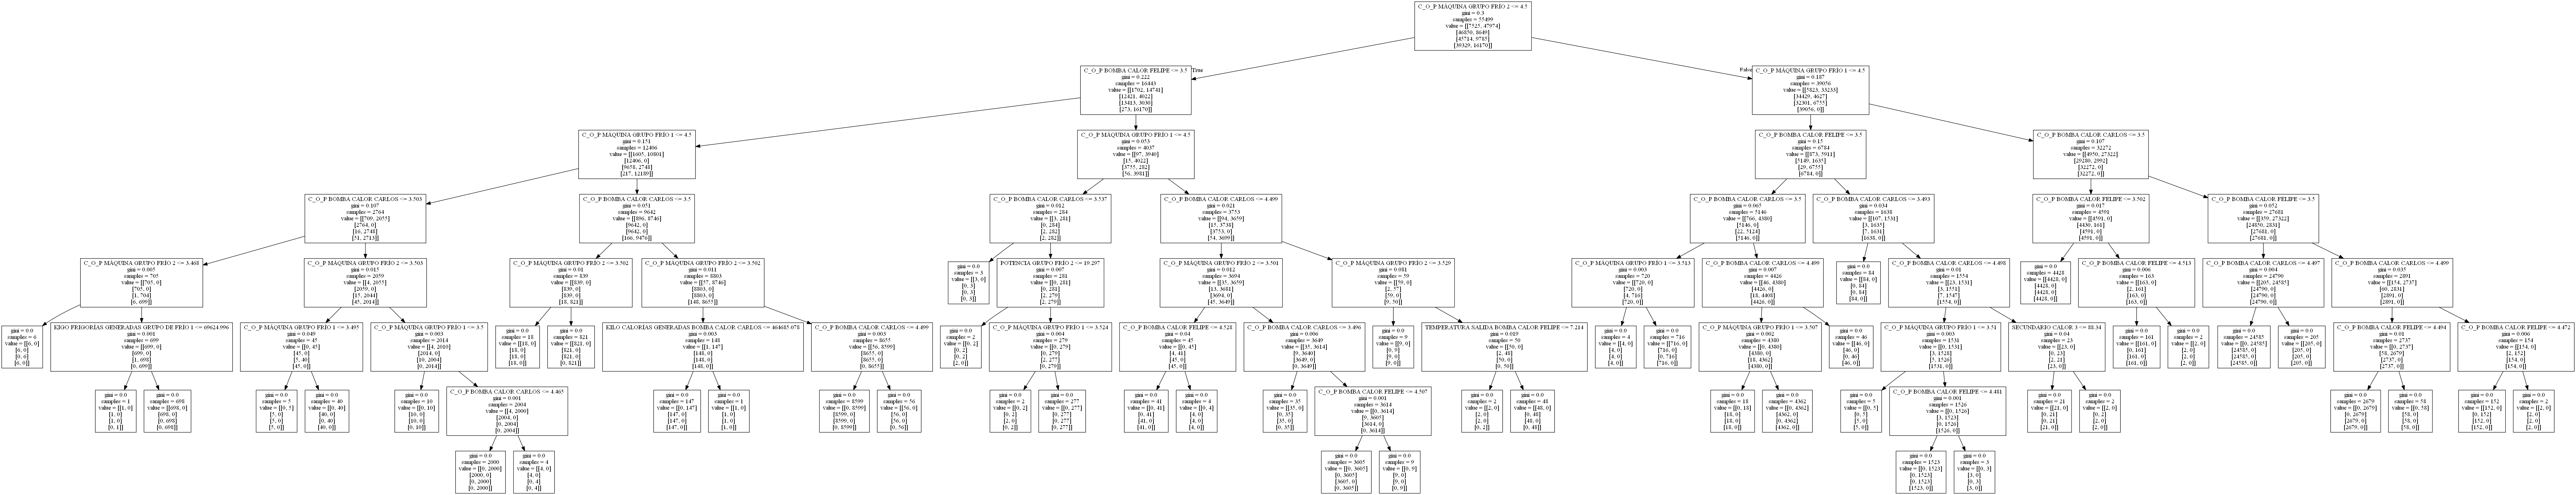

In [10]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree.dot -o tree.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
rf.oob_score_

0.9991171012090307

In [13]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='treeRF.dot', 
                feature_names = X.columns,
                class_names = y.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

myCmd = 'dot -Tpng treeRF.dot -o treeRF.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'treeRF.png')

## Modelos de Prediccion